In [73]:
import numpy as np
import pandas as pd
import mglearn

from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import statsmodels.formula.api as smf

from sklearn.feature_extraction import FeatureHasher

### Parte 1 Análise de Sentimentos com TF-IDF e Regressão Logística

#### Questão 1
Baixe e carregue o Large Movie Review Dataset.
Em seguida, realize o redimensionamento das features utilizando a técnica TF-IDF.

In [ ]:
reviews_train = load_files("data/aclImdb/train/")
reviews_test = load_files("data/aclImdb/test/")

text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.decode("utf-8").replace("<br />", " ") for doc in text_train]

text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.decode("utf-8").replace("<br />", " ") for doc in text_test]  

In [ ]:
vectorizer = TfidfVectorizer()
text_train_tfidf = vectorizer.fit_transform(text_train)
text_test_tfidf = vectorizer.transform(text_test) 

#### Questão 2
A partir do resultado da Questão 1, exiba as 10 features com os maiores valores de TF-IDF e as 10 com os menores valores de TF-IDF.
Comente o que essas features nos informam (se informam algo relevante) em relação ao objetivo de analisar sentimentos nas resenhas.

In [76]:
max_value = text_train_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(vectorizer.get_feature_names_out())
print("10 com os maiores valores de TF-IDF: \n{}".format( feature_names[sorted_by_tfidf[-10:]]))
print("10 features com os menores valores de TF-IDF:\n{}".format( feature_names[sorted_by_tfidf[:10]]))

10 com os maiores valores de TF-IDF: 
['botched' 'darkman' 'steve' 'wei' 'doodlebops' 'lupin' 'smallville'
 'scanners' 'nr' 'pokemon']
10 features com os menores valores de TF-IDF:
['crossface' 'turnbuckles' 'wassup' 'clotheslining' 'brawled' 'dudleys'
 'somersaulted' 'somersaulting' 'gloated' 'hurracanrana']


_As features com valores elevados de TF-IDF correspondem a termos que aparecem de forma muito específica em poucos documentos, recebendo alto peso por serem raros no corpus. Frequentemente, essas palavras são nomes próprios, títulos de filmes ou termos muito específicos. Apesar do alto valor de TF-IDF, esses termos nem sempre são relevantes para a análise de sentimentos, pois não carregam necessariamente polaridade emocional._<br>

_Já as features com valores baixos de TF-IDF são palavras que aparecem em muitos documentos e, portanto, possuem baixo poder discriminativo. Essas palavras tendem a ser comuns no idioma e pouco informativas para a tarefa de classificação de sentimentos, contribuindo pouco para a diferenciação entre resenhas positivas e negativas._



#### Questão 3
Utilizando os dados redimensionados da Questão 1, construa um modelo de classificação baseado em Regressão Logística e indique a precisão obtida.

In [ ]:
model = LogisticRegression(C=1, max_iter=1000)
model.fit(text_train_tfidf, y_train)

acc = accuracy_score(y_test, model.predict(text_test_tfidf)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 88.28%


#### Questão 4
Crie um gráfico de barras exibindo:
* Os 40 maiores coeficientes da regressão logística construída na Questão 3
* Os 40 menores coeficientes
<br>Algum desses coeficientes parece não ser um indicador claro do sentimento para o qual foi classificado pelo modelo? Comente sua observação.

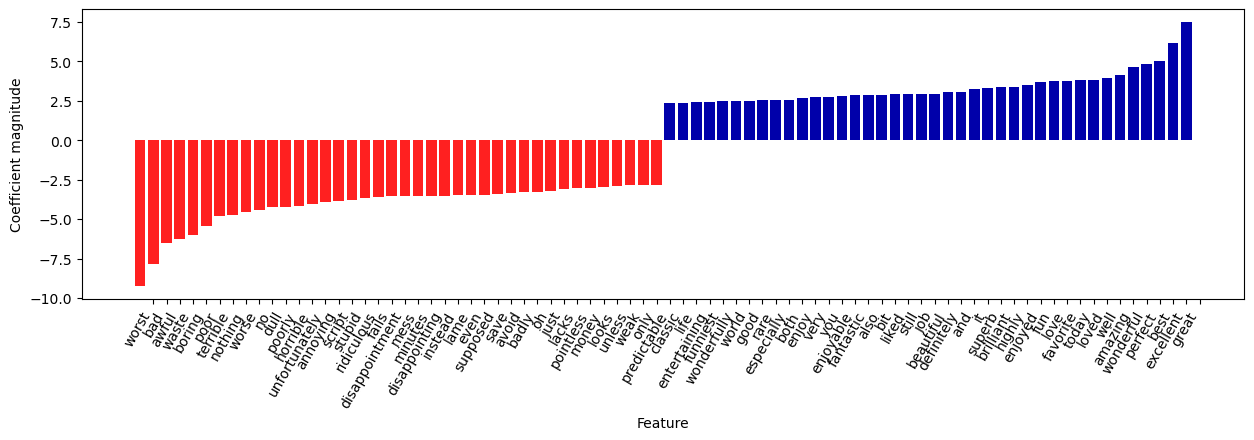

In [ ]:
feature_names = vectorizer.get_feature_names_out()

mglearn.tools.visualize_coefficients(
    model.coef_,
    feature_names,
    n_top_features=40
)

### Parte 2 Vetorização de Variáveis Categóricas
Considere a Tabela abaixo como um toy dataset para as próximas questões.

In [ ]:
tabela1 = {
    "Dia": ["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9", "D10", "D11", "D12", "D13", "D14"],
    "Aspecto": ["Sol", "Sol", "Nuvens", "Chuva", "Chuva", "Chuva", "Nuvens", "Sol", "Sol", "Chuva", "Sol", "Nuvens", "Nuvens", "Chuva"],
    "Temp": ["Quente", "Quente", "Quente", "Ameno", "Fresco", "Fresco", "Fresco", "Ameno", "Fresco", "Ameno", "Ameno", "Ameno", "Quente", "Ameno"],
    "Umidade": ["Elevada", "Elevada", "Elevada", "Elevada", "Normal", "Normal", "Normal", "Elevada", "Normal", "Normal", "Normal", "Elevada", "Normal", "Elevada"],
    "Vento": ["Fraco", "Forte", "Fraco", "Fraco", "Fraco", "Forte", "Forte", "Fraco", "Fraco", "Fraco", "Forte", "Forte", "Fraco", "Forte"],
    "Jogar Tênis": ["Não", "Não", "Sim", "Sim", "Sim", "Não", "Sim", "Sim", "Sim", "Sim", "Sim", "Sim", "Sim", "Não"]
}

df_tabela = pd.DataFrame(tabela1)

#### Questão 5
Vetorize as variáveis categóricas da Tabela 1 utilizando a técnica de One-Hot Encoding.

In [ ]:
colunas_categoricas = df_tabela.columns.drop('Jogar Tênis')

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), colunas_categoricas),
    remainder='passthrough'
)

dados_onehot = one_hot_enc.fit_transform(df_tabela.drop('Jogar Tênis', axis=1))
dados_onehot = pd.DataFrame(
    dados_onehot.toarray(),
    columns=one_hot_enc.get_feature_names_out()
)

print(dados_onehot)

    onehotencoder__Dia_D1  onehotencoder__Dia_D10  onehotencoder__Dia_D11  \
0                     1.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   
5                     0.0                     0.0                     0.0   
6                     0.0                     0.0                     0.0   
7                     0.0                     0.0                     0.0   
8                     0.0                     0.0                     0.0   
9                     0.0                     1.0                     0.0   
10                    0.0                     0.0                     1.0   
11                    0.0                     0.0                     0.0   

#### Questão 6
Vetorize as variáveis categóricas da Tabela 1 utilizando a técnica de Dummy Encoding.

In [ ]:
dados_dummy = pd.get_dummies(df_tabela.drop(columns='Jogar Tênis'), drop_first=True).astype(int)
print(dados_dummy)

    Dia_D10  Dia_D11  Dia_D12  Dia_D13  Dia_D14  Dia_D2  Dia_D3  Dia_D4  \
0         0        0        0        0        0       0       0       0   
1         0        0        0        0        0       1       0       0   
2         0        0        0        0        0       0       1       0   
3         0        0        0        0        0       0       0       1   
4         0        0        0        0        0       0       0       0   
5         0        0        0        0        0       0       0       0   
6         0        0        0        0        0       0       0       0   
7         0        0        0        0        0       0       0       0   
8         0        0        0        0        0       0       0       0   
9         1        0        0        0        0       0       0       0   
10        0        1        0        0        0       0       0       0   
11        0        0        1        0        0       0       0       0   
12        0        0     

#### Questão 7
Vetorize as variáveis categóricas da Tabela 1 utilizando a técnica de Effect Encoding.

In [ ]:
df_tabela['target'] = df_tabela['Jogar Tênis'].map({'Sim': 1, 'Não': 0})

modelo = smf.ols(
    formula='target ~ C(Aspecto, Sum) + C(Temp, Sum) + C(Umidade, Sum) + C(Vento, Sum)',
    data=df_tabela
).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     6.262
Date:                Tue, 03 Jun 2025   Prob (F-statistic):             0.0147
Time:                        18:50:44   Log-Likelihood:                 4.2179
No. Observations:                  14   AIC:                             5.564
Df Residuals:                       7   BIC:                             10.04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

c:\Users\Leiil\miniconda3\envs\meu_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


#### Questão 8
Compare os resultados obtidos nas questões 5, 6 e 7. Organize a comparação em uma tabela e comente as principais diferenças entre os métodos.

*O One-Hot Encoding representa cada categoria por uma coluna binária, utilizando k colunas para uma variável com k categorias. Apesar de simples e intuitivo, esse método pode introduzir multicolinearidade em modelos lineares, pois as colunas são linearmente dependentes.*

*O Dummy Encoding é semelhante ao One-Hot Encoding, porém remove uma das categorias, utilizando apenas k−1 colunas. A categoria removida passa a ser representada implicitamente pelo vetor de zeros, o que evita o problema da multicolinearidade e torna esse método mais adequado para modelos lineares.*

*Já o Effect Encoding também utiliza k−1 colunas, mas codifica as categorias usando os valores -1, 0 e 1. Nesse caso, os coeficientes representam o desvio de cada categoria em relação à média global da variável dependente, o que facilita interpretações estatísticas quando não se deseja escolher uma categoria de referência específica.*

#### Questão 9
Com base nos resultados das questões 5, 6 e 7, explique quais são as vantagens da vetorização de variáveis categóricas.

*A vetorização de variáveis categóricas é essencial em aprendizado de máquina, pois a maioria dos algoritmos trabalha exclusivamente com dados numéricos. Técnicas como One-Hot Encoding, Dummy Encoding e Effect Encoding permitem transformar categorias em representações numéricas sem impor uma ordem artificial entre elas, preservando corretamente a informação categórica.*

*Além disso, esses métodos tornam os dados compatíveis com modelos estatísticos e de machine learning, possibilitando tanto o treinamento quanto a interpretação dos resultados. O Dummy Encoding e o Effect Encoding, em particular, ajudam a evitar problemas de multicolinearidade em modelos lineares, enquanto o Effect Encoding facilita a interpretação dos coeficientes como desvios em relação à média global. Dessa forma, a vetorização adequada das variáveis categóricas contribui para modelos mais estáveis, interpretáveis e com melhor desempenho preditivo.*

#### Questão 10
Agora, explique quais seriam as possíveis desvantagens da vetorização de variáveis categóricas, considerando os mesmos resultados.

A*pesar de ser fundamental, a vetorização de variáveis categóricas apresenta algumas desvantagens. Técnicas como One-Hot Encoding e Dummy Encoding podem gerar um grande número de variáveis, aumentando significativamente a dimensionalidade do conjunto de dados, o que pode afetar o desempenho computacional e aumentar o risco de overfitting.*

*Além disso, essas técnicas não representam adequadamente variáveis categóricas com ordenação natural, pois tratam todas as categorias como independentes. Outro ponto negativo é a redução da interpretabilidade do modelo, especialmente quando o número de categorias é elevado. A escolha inadequada da técnica de vetorização pode introduzir problemas como multicolinearidade ou dificultar a interpretação dos coeficientes em modelos lineares.*

### Parte 3 Outras Técnicas de Transformação de Features

#### Questão 11
Explique o que é e demonstre como pode ser utilizada a técnica de Feature Hashing. Para a demonstração, utilize os dados do toy dataset representado pela Tabela 1.

In [ ]:
df_hash = df_tabela.drop(columns=['Jogar Tênis'])
dados_dict = df_hash.to_dict(orient='records')

h = FeatureHasher(n_features=10, input_type='dict')
f = h.transform(dados_dict)

print(f.toarray())

[[-1.  0.  0. -1. -1.  0. -1.  0.  1.  0.]
 [-1.  0.  1. -1. -1.  0.  1.  0.  0.  0.]
 [-1.  1.  0. -2.  0.  1. -1.  0.  0.  0.]
 [-1.  2.  0.  0.  0.  0. -1.  0. -1.  1.]
 [ 0.  3.  0.  0.  0. -1. -2.  0.  0.  0.]
 [ 0.  2.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  2.  0.  0.  0.  1.  0.  0.  0.  0.]
 [-1.  1.  0.  0. -1.  1. -1.  0. -1.  0.]
 [ 0.  2.  0.  0. -1.  0. -2.  0.  0. -1.]
 [ 0.  3. -1.  0.  0.  0. -1.  0. -1.  0.]
 [ 0.  2.  0.  0. -1.  0.  1.  0.  0.  0.]
 [-1.  1. -1.  0.  0.  1.  1.  0. -1.  0.]
 [ 0.  2.  0. -1. -1.  1. -1.  0.  0.  0.]
 [-1.  1.  0.  0.  0.  0.  1.  0. -2.  0.]]


*Feature Hashing é uma técnica de vetorização que mapeia features categóricas para um espaço vetorial de dimensão fixa utilizando uma função hash. Diferentemente do One-Hot Encoding, o Feature Hashing não mantém um vocabulário explícito das categorias, o que reduz o consumo de memória e permite lidar eficientemente com grandes volumes de dados e categorias desconhecidas.*


#### Questão 12
Explique o que é e demonstre como pode ser utilizada a técnica de Bin Counting. Para a demonstração, utilize os dados do toy dataset representado pela Tabela 1


In [ ]:
colunas_categoricas = ["Aspecto", "Temp", "Umidade", "Vento"] 

for col in colunas_categoricas:
    contagem = df_tabela[col].value_counts()
    df_tabela[col + "_bin_count"] = df_tabela[col].map(contagem)

print(df_tabela)

    Dia Aspecto    Temp  Umidade  Vento Jogar Tênis  target  \
0    D1     Sol  Quente  Elevada  Fraco         Não       0   
1    D2     Sol  Quente  Elevada  Forte         Não       0   
2    D3  Nuvens  Quente  Elevada  Fraco         Sim       1   
3    D4   Chuva   Ameno  Elevada  Fraco         Sim       1   
4    D5   Chuva  Fresco   Normal  Fraco         Sim       1   
5    D6   Chuva  Fresco   Normal  Forte         Não       0   
6    D7  Nuvens  Fresco   Normal  Forte         Sim       1   
7    D8     Sol   Ameno  Elevada  Fraco         Sim       1   
8    D9     Sol  Fresco   Normal  Fraco         Sim       1   
9   D10   Chuva   Ameno   Normal  Fraco         Sim       1   
10  D11     Sol   Ameno   Normal  Forte         Sim       1   
11  D12  Nuvens   Ameno  Elevada  Forte         Sim       1   
12  D13  Nuvens  Quente   Normal  Fraco         Sim       1   
13  D14   Chuva   Ameno  Elevada  Forte         Não       0   

    Aspecto_bin_count  Temp_bin_count  Umidade_bin_cou

*Bin Counting é uma técnica de vetorização de variáveis categóricas que substitui cada categoria pelo número de vezes que ela aparece no conjunto de dados, ou seja, a informação categórica é transformada em valores numéricos que refletem a frequência das categorias.*